In [1]:
#!/usr/bin/env python3
# -*- coding: utf-8 -*-
"""
Created on Mon Oct  7 15:51:46 2019

@author: Thada.Ji
"""

import pandas as pd
import numpy as np
import xgboost
import shap


# Read data
dataset = pd.read_csv('framingham.csv')
dataset.info()

# load JS visualization code to notebook
shap.initjs()

# train XGBoost model
data = dataset.drop(columns=['TenYearCHD'])
labels = dataset['TenYearCHD']
model = xgboost.train({"learning_rate": 0.01}, xgboost.DMatrix(data, label = labels), 100)
 
# explain the model's predictions using SHAP values
# (same syntax works for LightGBM, CatBoost, and scikit-learn models)
explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(data)

# visualize the first prediction's explanation (use matplotlib=True to avoid Javascript)
shap.force_plot(explainer.expected_value, shap_values, data)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4240 entries, 0 to 4239
Data columns (total 16 columns):
male               4240 non-null int64
age                4240 non-null int64
education          4135 non-null float64
currentSmoker      4240 non-null int64
cigsPerDay         4211 non-null float64
BPMeds             4187 non-null float64
prevalentStroke    4240 non-null int64
prevalentHyp       4240 non-null int64
diabetes           4240 non-null int64
totChol            4190 non-null float64
sysBP              4240 non-null float64
diaBP              4240 non-null float64
BMI                4221 non-null float64
heartRate          4239 non-null float64
glucose            3852 non-null float64
TenYearCHD         4240 non-null int64
dtypes: float64(9), int64(7)
memory usage: 530.1 KB


//anaconda3/envs/IRP_CVD/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
//anaconda3/envs/IRP_CVD/lib/python3.6/site-packages/xgboost/core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \
//anaconda3/envs/IRP_CVD/lib/python3.6/site-packages/shap/plots/force.py:145: UserWarning: shap.force_plot is slow for many thousands of rows, try subsampling your data.
  warnings.warn("shap.force_plot is slow for many thousands of rows, try subsampling your data.")


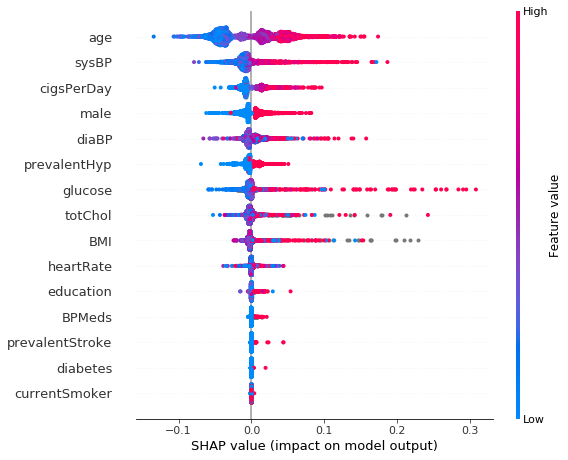

In [2]:
shap.summary_plot(shap_values, data)

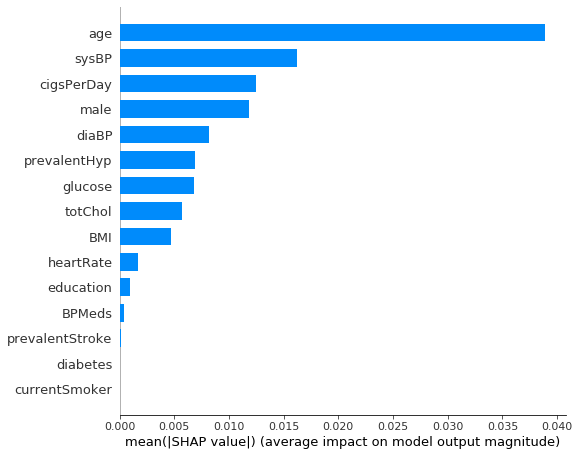

In [3]:
shap.summary_plot(shap_values, data, plot_type="bar")

In [4]:
shap.force_plot(explainer.expected_value, shap_values[0,:], data.iloc[0,:])

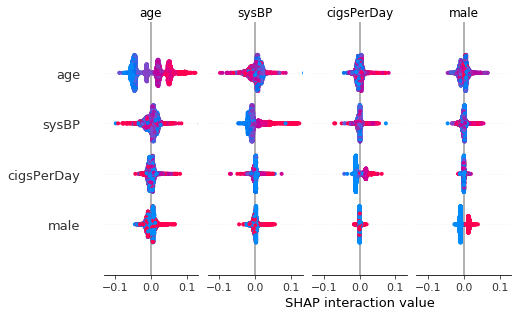

In [5]:
shap_interaction_values = shap.TreeExplainer(model).shap_interaction_values(data)
shap.summary_plot(shap_interaction_values, features = data, max_display = 4)

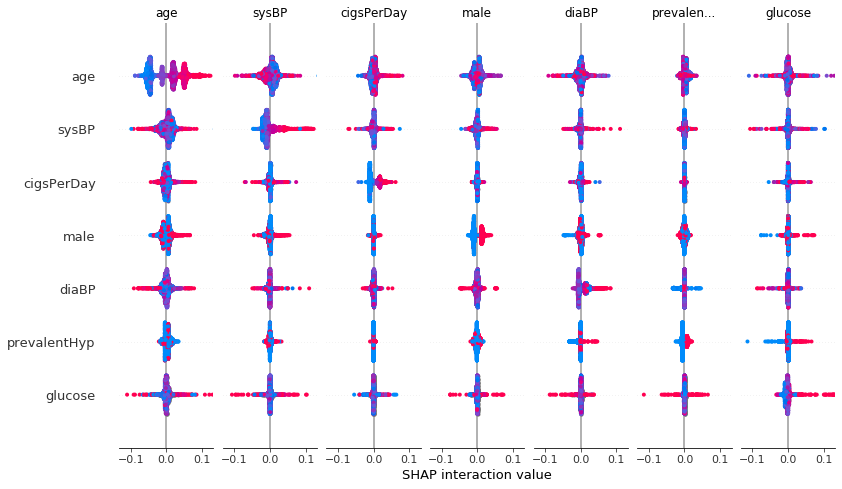

In [6]:
shap.summary_plot(shap_interaction_values, features = data)

In [12]:
shap_table = pd.DataFrame(shap_values, columns = data.columns)
shap_table

male       age  education  currentSmoker  cigsPerDay    BPMeds  \
0     0.004850 -0.049569   0.001581      -0.000004   -0.008710 -0.000093   
1    -0.003808 -0.038810  -0.000592      -0.000004   -0.012868 -0.000164   
2     0.014329 -0.009230  -0.000118       0.000002    0.014816 -0.000119   
3    -0.019871  0.083859   0.001847       0.000002    0.049019 -0.000311   
4    -0.005736 -0.025115  -0.000084       0.000004    0.020525 -0.000131   
...        ...       ...        ...            ...         ...       ...   
4235 -0.010874 -0.018829  -0.000629       0.000002    0.015389  0.003421   
4236 -0.005273 -0.037844  -0.000056       0.000004    0.006280 -0.000112   
4237 -0.014007  0.013319  -0.000456      -0.000002   -0.008143 -0.000317   
4238  0.007892 -0.057894  -0.000338      -0.000004   -0.013786 -0.000094   
4239 -0.005056 -0.039858  -0.000214       0.000004    0.015036 -0.000125   

      prevalentStroke  prevalentHyp  diabetes   totChol     sysBP     diaBP  \
0           -0.000034     -0.005045 -0.000005 -0.004451 -0.012467  0.002746   
1           -0.000041     -0.002606 -0.000008 -0.000841 -0.006184 -0.002303   
2           -0.000043     -0.003853 -0.000009  0.000226 -0.003164 -0.011609   
3           -0.000051      0.011369 -0.000009 -0.002630  0.040521  0.004973   
4           -0.000040     -0.003078 -0.000008  0.009468 -0.006383 -0.004728   
...               ...           ...       ...       ...       ...       ...   
4235        -0.000040     -0.008235 -0.000004 -0.000232 -0.006417 -0.002968   
4236        -0.000034     -0.003428 -0.000008 -0.006723 -0.005060 -0.002946   
4237        -0.000041     -0.007900 -0.000004  0.000374 -0.003675 -0.005004   
4238        -0.000033      0.002732 -0.000012 -0.002963 -0.006466  0.010867   
4239        -0.000034     -0.003057 -0.000005 -0.006531 -0.004562 -0.007975   

           BMI  heartRate   glucose  
0    -0.002386  -0.000602 -0.000285  
1    -0.001143   0.002528 -0.000723  
2    -0.004604  -0.000329 -0.004221  
3    -0.000646   0.000214  0.032019  
4    -0.002504  -0.000441 -0.002689  
...        ...        ...       ...  
4235 -0.003073  -0.001557 -0.001330  
4236  0.000539  -0.000637 -0.002527  
4237 -0.002733  -0.001265 -0.000903  
4238 -0.002210   0.001703 -0.004385  
4239  0.002653  -0.000932 -0.001159  

[4240 rows x 15 columns]

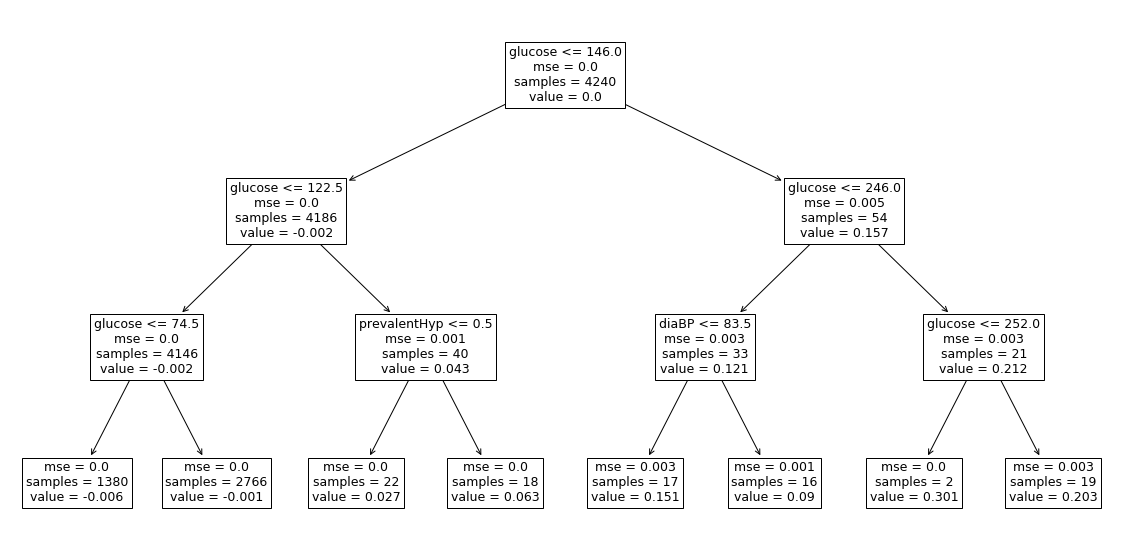

[(0, 'male'), (1, 'age'), (2, 'education'), (3, 'currentSmoker'), (4, 'cigsPerDay'), (5, 'BPMeds'), (6, 'prevalentStroke'), (7, 'prevalentHyp'), (8, 'diabetes'), (9, 'totChol'), (10, 'sysBP'), (11, 'diaBP'), (12, 'BMI'), (13, 'heartRate'), (14, 'glucose')]


In [88]:
# import the regressor 
from sklearn.tree import DecisionTreeRegressor, plot_tree 
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer

# create a regressor object 
regressor = DecisionTreeRegressor(random_state = 0, max_depth = 3)  
imp_mean = SimpleImputer(missing_values = np.nan, strategy = 'mean').fit(data)

# fit the regressor with X and Y data 
regressor.fit(imp_mean.transform(data), shap_table['glucose']) 

# import export_graphviz 
from sklearn.tree import export_graphviz  
import graphviz

# export the decision tree to a tree.dot file 
# for visualizing the plot easily anywhere 


plt.figure(figsize = (20, 10) )
plot_tree(regressor, feature_names = data.columns) 
plt.show()
print([ (i, data.columns[i]) for i in range(len(data.columns) )])



